<a href="https://colab.research.google.com/github/hiroalchem/data_science_lecture/blob/main/plot_test_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データサイエンス講義第三回 (2)
これはデータサイエンス講義第三回用スクリプトです   
Colaboratoryのハードウェア アクセラレータ設定は今回はCPU (None) にして実行してください   
上のランタイムタブからランタイムのタイプを変更を選択してください   
Google Drive をマウントしてください

このスクリプトではテストデータで検出した結果をグラフにしてみます

In [1]:
# lectureのディレクトリに移動します
%cd /content/drive/MyDrive/lecture2020

/content/drive/MyDrive/lecture2020


In [23]:
# 必要なライブラリをimportします
%matplotlib inline
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
from xml.etree.ElementTree import *

In [4]:
# boxの情報を得るための関数
def get_box_list(file_path, tag_name):
    tree = parse(file_path)
    elem = tree.getroot()
    box = []
    for (i, objects) in enumerate(elem.findall('object')):
        name = objects.find('name').text
        if name == tag_name:
            xmin = int(objects.find('bndbox/xmin').text)
            xmax = int(objects.find('bndbox/xmax').text)
            ymin = int(objects.find('bndbox/ymin').text)
            ymax = int(objects.find('bndbox/ymax').text)
            box.append([xmin,ymin,xmax,ymax])
    return box

In [6]:
# まずxmlファイルをpathを取得します
data_dir = Path('./trial1/output_xml')
xmls = sorted(list(data_dir.glob('./*xml')))
xmls

[PosixPath('trial1/output_xml/IXMtest_C19_s4_w1AD3DC23E-B9B5-46E9-9716-26096C672A13_0.xml'),
 PosixPath('trial1/output_xml/IXMtest_C19_s4_w1AD3DC23E-B9B5-46E9-9716-26096C672A13_1.xml'),
 PosixPath('trial1/output_xml/IXMtest_C19_s4_w1AD3DC23E-B9B5-46E9-9716-26096C672A13_2.xml'),
 PosixPath('trial1/output_xml/IXMtest_C19_s4_w1AD3DC23E-B9B5-46E9-9716-26096C672A13_3.xml'),
 PosixPath('trial1/output_xml/IXMtest_G01_s2_w1FBE52723-8BDF-4346-89BB-216A4A69ED1C_0.xml'),
 PosixPath('trial1/output_xml/IXMtest_G01_s2_w1FBE52723-8BDF-4346-89BB-216A4A69ED1C_1.xml'),
 PosixPath('trial1/output_xml/IXMtest_G01_s2_w1FBE52723-8BDF-4346-89BB-216A4A69ED1C_2.xml'),
 PosixPath('trial1/output_xml/IXMtest_G01_s2_w1FBE52723-8BDF-4346-89BB-216A4A69ED1C_3.xml'),
 PosixPath('trial1/output_xml/IXMtest_G12_s6_w16850371E-A405-4D73-9816-F5F68F885D38_0.xml'),
 PosixPath('trial1/output_xml/IXMtest_G12_s6_w16850371E-A405-4D73-9816-F5F68F885D38_1.xml'),
 PosixPath('trial1/output_xml/IXMtest_G12_s6_w16850371E-A405-4D73-9816

In [34]:
# namesのリスト内を自分の作ったlabel_mapのitemのnameのリストに変更してください
# nameごとにxmlからboxのリストを取得してその数を足し合わせます
names =['cell', 'micro']
nums = []
for name in names:
  num = 0
  for xml in xmls:
    num = num + len(get_box_list(str(xml), name))
  nums.append(num)
print(nums)

[434, 38]


In [10]:
# dataframeにします
df = pd.DataFrame({'type':names,
                   'num': nums})
df

,type,num
0,cell,434
1,micro,38


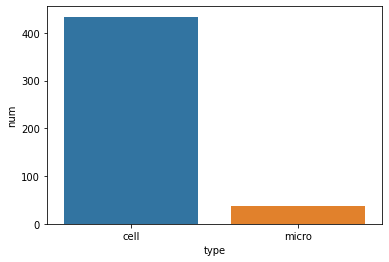

In [19]:
# グラフにします
sns.barplot(x="type", y='num', data=df)

In [24]:
# 次は画像ごとにしてみます
# 末尾の数字より前の画像名のsetを取得
image_names = list(set([os.path.basename(str(x)[:-6]) for x in xmls]))
image_names

['IXMtest_G01_s2_w1FBE52723-8BDF-4346-89BB-216A4A69ED1C',
 'IXMtest_J02_s8_w1D9C198F9-ECF0-4EF7-848D-AC7782CD3C28',
 'IXMtest_G12_s6_w16850371E-A405-4D73-9816-F5F68F885D38',
 'IXMtest_C19_s4_w1AD3DC23E-B9B5-46E9-9716-26096C672A13',
 'IXMtest_N18_s2_w1CC5ED51D-86C5-437D-8EDD-E56E4C949B3B']

In [36]:
# 自分のlabel_mapのitemに合わせてリストの名前と数を調整してください
nums_cell = []
nums_micro = []
for image_name in image_names:
  num_cell_temp = 0
  num_micro_temp = 0
  for xml in xmls:
    if image_name in str(xml):
      num_cell_temp = num_cell_temp + len(get_box_list(str(xml), 'cell'))
      num_micro_temp = num_micro_temp + len(get_box_list(str(xml), 'micro'))
  nums_cell.append(num_cell_temp)
  nums_micro.append(num_micro_temp)
  
print(nums_cell)
print(nums_micro)

[63, 83, 107, 90, 91]
[7, 6, 10, 5, 10]


In [39]:
# dataframeにします
df2 = pd.DataFrame({'image':image_names*len(names),
                    'type':[names[0]]*len(image_names) + [names[1]]*len(image_names) ,
                   'nums': nums_cell + nums_micro})
df2

,image,type,nums
0,IXMtest_G01_s2_w1FBE52723-8BDF-4346-89BB-216A4...,cell,63
1,IXMtest_J02_s8_w1D9C198F9-ECF0-4EF7-848D-AC778...,cell,83
2,IXMtest_G12_s6_w16850371E-A405-4D73-9816-F5F68...,cell,107
3,IXMtest_C19_s4_w1AD3DC23E-B9B5-46E9-9716-26096...,cell,90
4,IXMtest_N18_s2_w1CC5ED51D-86C5-437D-8EDD-E56E4...,cell,91
5,IXMtest_G01_s2_w1FBE52723-8BDF-4346-89BB-216A4...,micro,7
6,IXMtest_J02_s8_w1D9C198F9-ECF0-4EF7-848D-AC778...,micro,6
7,IXMtest_G12_s6_w16850371E-A405-4D73-9816-F5F68...,micro,10
8,IXMtest_C19_s4_w1AD3DC23E-B9B5-46E9-9716-26096...,micro,5
9,IXMtest_N18_s2_w1CC5ED51D-86C5-437D-8EDD-E56E4...,micro,10


[Text(0, 0, 'IXMtest_G01_s2_w1FBE52723-8BDF-4346-89BB-216A4A69ED1C'),
 Text(0, 0, 'IXMtest_J02_s8_w1D9C198F9-ECF0-4EF7-848D-AC7782CD3C28'),
 Text(0, 0, 'IXMtest_G12_s6_w16850371E-A405-4D73-9816-F5F68F885D38'),
 Text(0, 0, 'IXMtest_C19_s4_w1AD3DC23E-B9B5-46E9-9716-26096C672A13'),
 Text(0, 0, 'IXMtest_N18_s2_w1CC5ED51D-86C5-437D-8EDD-E56E4C949B3B')]

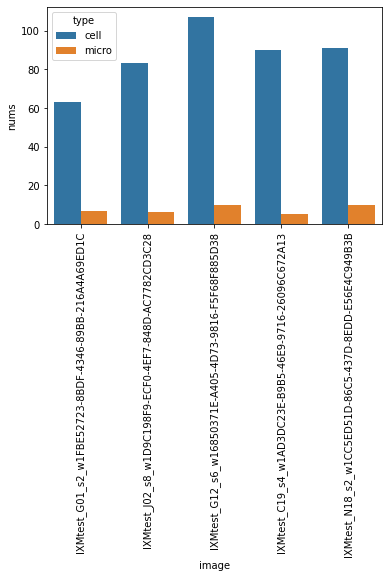

In [47]:
# グラフにします
g = sns.barplot(x='image', y='nums', hue='type', data=df2)
g.set_xticklabels(image_names, rotation=90)